モジュールのインポート  

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.decomposition import LatentDirichletAllocation as LDA

色々初期に設定

In [2]:
surf = cv2.xfeatures2d.SURF_create()
class_size = 20
cls = KMeans(n_clusters=class_size)

quest_arr = []
ORG_arr = []
Mypage_arr = []
battle_arr= []

クエスト画像の特徴点記述し１つにまとめる

In [3]:
for i in range(10):
    quest = cv2.imread("quest_"+str(i)+".jpg")
    Gquest = cv2.imread("quest_"+str(i)+".jpg", 0)

    quest_kp, quest_desc = surf.detectAndCompute(Gquest, None)
    quest_descriptors = quest_desc.astype(np.float32)

    quest_arr.extend(quest_descriptors)
    print("complete "+str(i))

complete 0
complete 1
complete 2
complete 3
complete 4
complete 5
complete 6
complete 7
complete 8
complete 9


編成画像の特徴点記述し１つにまとめる

In [4]:
for i in range(10):
    ORG = cv2.imread("ORG_"+str(i)+".jpg")
    GORG = cv2.imread("ORG_"+str(i)+".jpg", 0)

    ORG_kp, ORG_desc = surf.detectAndCompute(GORG, None)
    ORG_descriptors = ORG_desc.astype(np.float32)

    ORG_arr.extend(ORG_descriptors)
    print("complete "+str(i))

complete 0
complete 1
complete 2
complete 3
complete 4
complete 5
complete 6
complete 7
complete 8
complete 9


マイページ画像の特徴点記述し１つにまとめる

In [5]:
for i in range(10):
    Mypage = cv2.imread("Mypage_"+str(i)+".jpg")
    GMypage = cv2.imread("Mypage_"+str(i)+".jpg", 0)

    Mypage_kp, Mypage_desc = surf.detectAndCompute(GMypage, None)
    Mypage_descriptors = Mypage_desc.astype(np.float32)

    Mypage_arr.extend(Mypage_descriptors)
    print("complete "+str(i))

complete 0
complete 1
complete 2
complete 3
complete 4
complete 5
complete 6
complete 7
complete 8
complete 9


バトル画像の特徴点記述し１つにまとめる

In [6]:
for i in range(10):
    battle = cv2.imread("battle_"+str(i)+".jpg")
    Gbattle = cv2.imread("battle_"+str(i)+".jpg", 0)

    battle_kp, battle_desc = surf.detectAndCompute(Gbattle, None)
    battle_descriptors = battle_desc.astype(np.float32)


    battle_arr.extend(battle_descriptors)
    print("complete "+str(i))

complete 0
complete 1
complete 2
complete 3
complete 4
complete 5
complete 6
complete 7
complete 8
complete 9


In [7]:
print('quest',len(quest_arr))
print('ORG',len(ORG_arr))
print('Mypage',len(Mypage_arr))
print('battle',len(battle_arr))

quest 129115
ORG 140480
Mypage 141397
battle 130630


In [8]:
all_arr = []

all_arr.extend(quest_arr)
all_arr.extend(ORG_arr)
all_arr.extend(Mypage_arr)
all_arr.extend(battle_arr)

len(all_arr)

541622

In [9]:
append_arr = []

append_arr.append(quest_arr)
append_arr.append(ORG_arr)
append_arr.append(Mypage_arr)
append_arr.append(battle_arr)

In [10]:
print(len(append_arr[0]))

129115


In [11]:
cls.fit(all_arr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

cls.predict(quest_arr)
cls.predict(ORG_arr)
cls.predict(Mypage_arr)
cls.predict(battle_arr)

In [12]:
len(cls.labels_)
print(cls.labels_)

[8 3 8 ... 1 5 5]


In [13]:
data = cls.labels_

In [14]:
print(type(data))
print(len(data))

<class 'numpy.ndarray'>
541622


(array([46696., 21721., 27391., 39684., 26781., 24719., 24460., 41034.,
        20940., 21874., 38338., 34537., 21459., 20601., 36437., 25405.,
        21500., 48045.]),
 array([ 0.        ,  1.05555556,  2.11111111,  3.16666667,  4.22222222,
         5.27777778,  6.33333333,  7.38888889,  8.44444444,  9.5       ,
        10.55555556, 11.61111111, 12.66666667, 13.72222222, 14.77777778,
        15.83333333, 16.88888889, 17.94444444, 19.        ]),
 <a list of 18 Patch objects>)

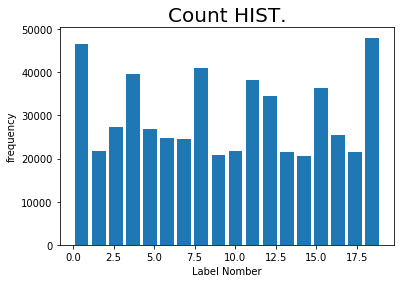

In [15]:
plt.title("Count HIST.", fontsize=20)
plt.ylabel("frequency")
plt.xlabel("Label Nomber")
plt.hist(cls.labels_, bins=18, rwidth=0.8)

quest 129115
ORG 140480
Mypage 141397
battle 130630

↓ここがなんかおかしい

In [16]:
data
data_str_trans =' '.join(map(str, data))
print(len(data_str_trans))
print(len(data))

1351439
541622


data_trans = str(data)
print(len(data))
print(len(data_trans))
data_trans

In [47]:
cv = CV(token_pattern='\\b\\w+\\b')
cved = cv.fit([data_str_trans])
cved_transfrom = cved.transform([data_str_trans])
print(cv)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='\\b\\w+\\b', tokenizer=None,
                vocabulary=None)


In [48]:
cv.get_feature_names()

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [49]:
lda = LDA(n_components=4,learning_method='online', max_iter=20)
lda = lda.fit(cved_transfrom)

In [50]:
features = cv.get_feature_names()

for topic in range(4):
    print("topic", topic)
    number_of_topic = lda.components_[topic] 
    word = ','.join(features[i] for i in number_of_topic.argsort()[:-18-1:-1])
    print(word, "\n")

topic 0
11,8,15,4,12,16,5,14,0,1,9,13,2,17,7,6,19,18 

topic 1
4,8,15,12,11,3,18,5,0,6,7,19,2,9,10,16,14,13 

topic 2
11,12,4,8,15,6,3,16,10,7,5,0,17,1,13,19,2,18 

topic 3
8,15,4,19,11,18,12,3,5,7,1,16,17,14,2,10,0,13 



In [56]:
test_data = []

In [57]:
quest_1 = cv2.imread("quest_11.jpg")
Gquest_1 = cv2.imread("quest_11.jpg", 0)

quest_2 = cv2.imread("quest_14.jpg")
Gquest_2 = cv2.imread("quest_14.jpg", 0)

test_quest_kp, test_quest_desc = surf.detectAndCompute(Gquest_1, None)
test_quest_descriptors = test_quest_desc.astype(np.float32)

test_quest_label = cls.predict(test_quest_descriptors)
test_data.append(test_quest_label)

test_quest_kp, test_quest_desc = surf.detectAndCompute(Gquest_2, None)
test_quest_descriptors = test_quest_desc.astype(np.float32)

test_quest_label2 = cls.predict(test_battle_descriptors)
test_data.append(test_quest_label2)

In [27]:
ORG_1 = cv2.imread("ORG_4.jpg")
GORG_1 = cv2.imread("ORG_4.jpg", 0)

ORG_2 = cv2.imread("ORG_14.jpg")
GORG_2 = cv2.imread("ORG_14.jpg", 0)

test_ORG_kp, test_ORG_desc = surf.detectAndCompute(GORG_1, None)
test_ORG_descriptors = test_ORG_desc.astype(np.float32)

test_ORG_label = cls.predict(test_ORG_descriptors)
test_data.append(test_ORG_label)

test_ORG_kp, test_ORG_desc = surf.detectAndCompute(GORG_2, None)
test_ORG_descriptors = test_ORG_desc.astype(np.float32)

test_ORG_label = cls.predict(test_ORG_descriptors)
test_data.append(test_ORG_label)

In [28]:
Mypage_1 = cv2.imread("Mypage_4.jpg")
GMypage_1 = cv2.imread("Mypage_4.jpg", 0)

Mypage_2 = cv2.imread("Mypage_14.jpg")
GMypage_2 = cv2.imread("Mypage_14.jpg", 0)

test_Mypage_kp, test_Mypage_desc = surf.detectAndCompute(GMypage_1, None)
test_Mypage_descriptors = test_Mypage_desc.astype(np.float32)

test_Mypage_label = cls.predict(test_Mypage_descriptors)
test_data.append(test_Mypage_label)

test_Mypage_kp, test_Mypage_desc = surf.detectAndCompute(GMypage_2, None)
test_Mypage_descriptors = test_Mypage_desc.astype(np.float32)

test_Mypage_label = cls.predict(test_Mypage_descriptors)
test_data.append(test_Mypage_label)

In [29]:
battle_1 = cv2.imread("battle_4.jpg")
Gbattle_1 = cv2.imread("battle_4.jpg", 0)

battle_2 = cv2.imread("battle_8.jpg")
Gbattle_2 = cv2.imread("battle_8.jpg", 0)

test_battle_kp, test_battle_desc = surf.detectAndCompute(Gbattle_1, None)
test_battle_descriptors = test_battle_desc.astype(np.float32)

test_battle_label = cls.predict(test_battle_descriptors)
test_data.append(test_battle_label)

test_battle_kp, test_bettle_desc = surf.detectAndCompute(Gbattle_2, None)
test_battle_descriptors = test_battle_desc.astype(np.float32)

test_battle_label = cls.predict(test_battle_descriptors)
test_data.append(test_battle_label)

In [ ]:
test_extend=[]
test_extend.extend(test_quest_label)
test_extend.extend(test_quest_label2)
test_extend.extend(test_ORG_label)
test_extend.extend(test_ORG)
test_extend.extend()
test_extend.extend()
test_extend.extend()
test_extend.extend()
test_extend.extend()
test_extend.extend()
test_extend.extend()
test_extend.extend()

([array([ 793.,  433.,  644.,  910.,  591.,  553.,  379.,  798.,  389.,
          521.,  934.,  928.,  385.,  468.,  863.,  493.,  446., 1053.]),
  array([1084.,  734.,  926.,  990.,  515.,  837.,  300., 1435.,  592.,
          445.,  599.,  752.,  574.,  854.,  448.,  865.,  719., 1408.])],
 array([ 0.        ,  1.05555556,  2.11111111,  3.16666667,  4.22222222,
         5.27777778,  6.33333333,  7.38888889,  8.44444444,  9.5       ,
        10.55555556, 11.61111111, 12.66666667, 13.72222222, 14.77777778,
        15.83333333, 16.88888889, 17.94444444, 19.        ]),
 <a list of 2 Lists of Patches objects>)

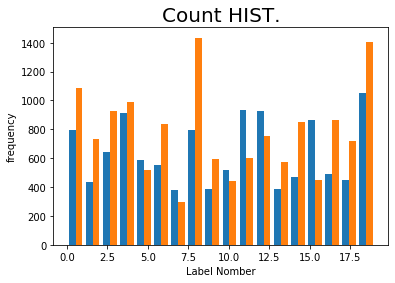

In [59]:
plt.title("Count HIST.", fontsize=20)
plt.ylabel("frequency")
plt.xlabel("Label Nomber")
plt.hist(test_data, bins=18, rwidth=0.8)

In [66]:
print(test_data)
print(len(test_data[1]))

[array([ 3,  3,  3, ..., 11,  3, 15], dtype=int32), array([ 6,  3,  3, ..., 16,  8,  1], dtype=int32)]
14077


In [83]:
test_data
test_data_trans=[]
transed =' '.join(map(str, test_data[0]))
test_data_trans.append(transed)
transed =' '.join(map(str, test_data[1]))
test_data_trans.append(transed)
print(len(test_data_trans))
print(len(test_data_trans[1]))

2
34817


In [85]:
print(type(test_data_trans))

<class 'list'>


In [89]:
cv_ed = cv.fit(test_data_trans)
test_transfrom = cved.transform(test_data_trans)

In [90]:
cv.get_feature_names()

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [91]:
lda_test1 = lda.transform(test_transfrom)

In [94]:
for i,lda in enumerate(lda_test1):
    print("### ",i)
    topicid=[i for i, x in enumerate(lda) if x == max(lda)]
    #print(test_data_trans[i])
    print("\nScore\n", lda)
    print(" >>> topic",topicid)
    print("")

###  0

Score
 [0.10047347 0.37455823 0.3561534  0.1688149 ]
 >>> topic [1]

###  1

Score
 [0.36963083 0.15003777 0.16698773 0.31334367]
 >>> topic [0]

